In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../../../data/titanic_train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
print('Процент выживших: ~', int(df['Survived'].mean()*100),'%' )

Процент выживших: ~ 38 %


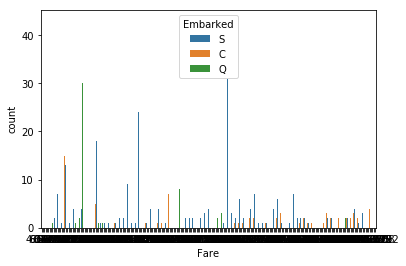

In [4]:
sns.countplot(x = 'Fare', hue='Embarked', data = df)

In [5]:
#Самые обеспеченные граждане из Southampton как мы видим

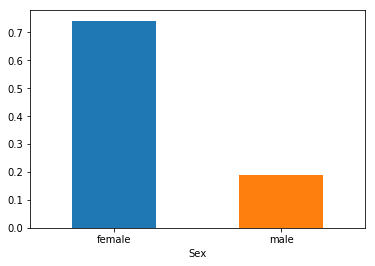

In [6]:
df.groupby('Sex')['Survived'].mean().plot(kind="bar", rot=0)

In [7]:
#<<Сначала женщины и дети!!!>>
#Неудивительно что в относительной мере выжило больше женщин 

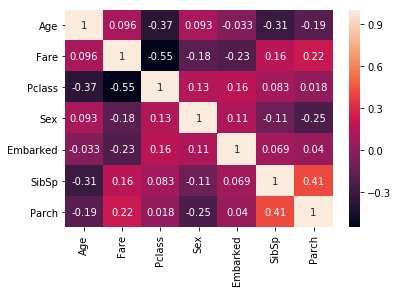

In [8]:
df['Sex']=df['Sex'].map({ 'male' : 1, 'female' : 0})
df['Embarked']=df['Embarked'].map({ 'C' : 0, 'Q' : 1, 'S' : 2 })
matrix = df[['Age','Fare','Pclass','Sex', 'Embarked', 'SibSp','Parch']].corr()
sns.heatmap(matrix, annot=True)

In [ ]:
# из heatmap'а можем заметить 2 пары коррелирующих признакоков
# 1 - чем класс ниже ( лучше ) , чем выше платежеспособность пассажира
# 2 - число братьев/сестер или супругов положительно коррелируют с количеством родителей/детей